### Case Study - SAT and University GPA

**Overview**

When deciding whether to admit an applicant, colleges take lots of factors, such as grades, sports, activities, leadership positions, awards, teacher recommendations, and test scores, into consideration. Using SAT scores as a basis of whether to admit a student or not has created some controversy. Among other things, people question whether the SATs are fair and whether they predict college performance.

This study examines the SAT and GPA information of 105 students who graduated from a state university with a B.S. in computer science. Using the grades and test scores from high school, can you predict a student's college grades?

Data file: SAT-GPA.xls 

Source: http://onlinestatbook.com/2/case_studies/sat.html

**Descriptions of Variables**

    Variable --> Description


* high_GPA --> 	High school grade point average
* math_SAT --> 	Math SAT score
* verb_SAT --> 	Verbal SAT score
* comp_GPA --> 	Computer science grade point average
* univ_GPA --> 	Overall university grade point average

**Import libraries**

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

**Read from file and present onscreen few rows of data**

For this task, I will create a dataframe using Pandas reading the xls file provided in the description. Below I will use df.head() to print the first 5 rows of the dataframe.

In [125]:
df = pd.read_excel("SAT-GPA.xls")
df.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


**Present some key information about data**

Here, I will use df.info() to explore the contents of the dataframe. By the results I can identify that there are 105 rows, 5 columns, including the non_null count and the respective columns type.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high_GPA  105 non-null    float64
 1   math_SAT  105 non-null    int64  
 2   verb_SAT  105 non-null    int64  
 3   comp_GPA  105 non-null    float64
 4   univ_GPA  105 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.2 KB


From the previous result I can tell that there are no null entries, meaning there aren't any empty cells. To go one step further I will check this again using df.isnull().sum() to have a clear view of whether there are empty cells for the columns.

In [132]:
df.isnull().sum()

high_GPA    0
math_SAT    0
verb_SAT    0
comp_GPA    0
univ_GPA    0
dtype: int64

However, having no empty cells doesn't necessarily prove the accuracy of the data. From a quick research online I have identified that in general the GPA score is calculated using a 0-4 scale. Additionally, the range for the individual SAT scores (math and verbal) is 200-800. Using this information I will proceed with an extra check to ensure my data fall within these ranges. 

In [135]:
df.agg(['min', 'max'])

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
min,2.03,516,480,2.03,2.08
max,4.00,718,732,4.00,3.81


**Present descriptive statistics of data in a Table format about the two variables: high_GPA and univ_GPA. Also for each variable:**

**1) Present relevant plots (box plot and barchart or histogram - whatever is appropriate) and**

**2) Explore the normality of the variable distributions**

Firstly, to present descriptibe statistics in a table format I will use df.describe(), however I will specify the columns I want to check.

In [139]:
df[['high_GPA', 'univ_GPA']].describe()

,high_GPA,univ_GPA
count,105.000000,105.000000
mean,3.076381,3.172857
std,0.516598,0.447194
min,2.030000,2.080000
25%,2.670000,3.010000
50%,3.170000,3.290000
75%,3.480000,3.470000
max,4.000000,3.810000


In this part I will create individual dataframes for each column of the dataframe to improve the readability of the code that is to be presented in the next steps.

In [142]:
high_GPA = df[['high_GPA']]
univ_GPA = df[['univ_GPA']]
comp_GPA = df[['comp_GPA']]
math_SAT = df[['math_SAT']]
verb_SAT = df[['verb_SAT']]

Next, I will present relevant plots for these variables. I will start by creating a container for all the elements of the visualization (fig) and use axes to refer to the individual subplots within the figure (axs). 

On the first subplot, I will display a boxplot for the high_GPA variable. Next, I will display a histogram and specify the number of bins to define some sort of detail in the histogram, which will later help me with understanding the distribution. On the subplots 3 and 4 I will repeat the same process for the univ_GPA variable.

As we can see by the 2 histograms, the distributions do not appear to be perfectly normally distributed. In a normal distribution we expect to see a bell shaped curve, in our case both histograms display some skewness towards the right side, while the univ_GPA has some outliers towards the lower scores that create another peak.

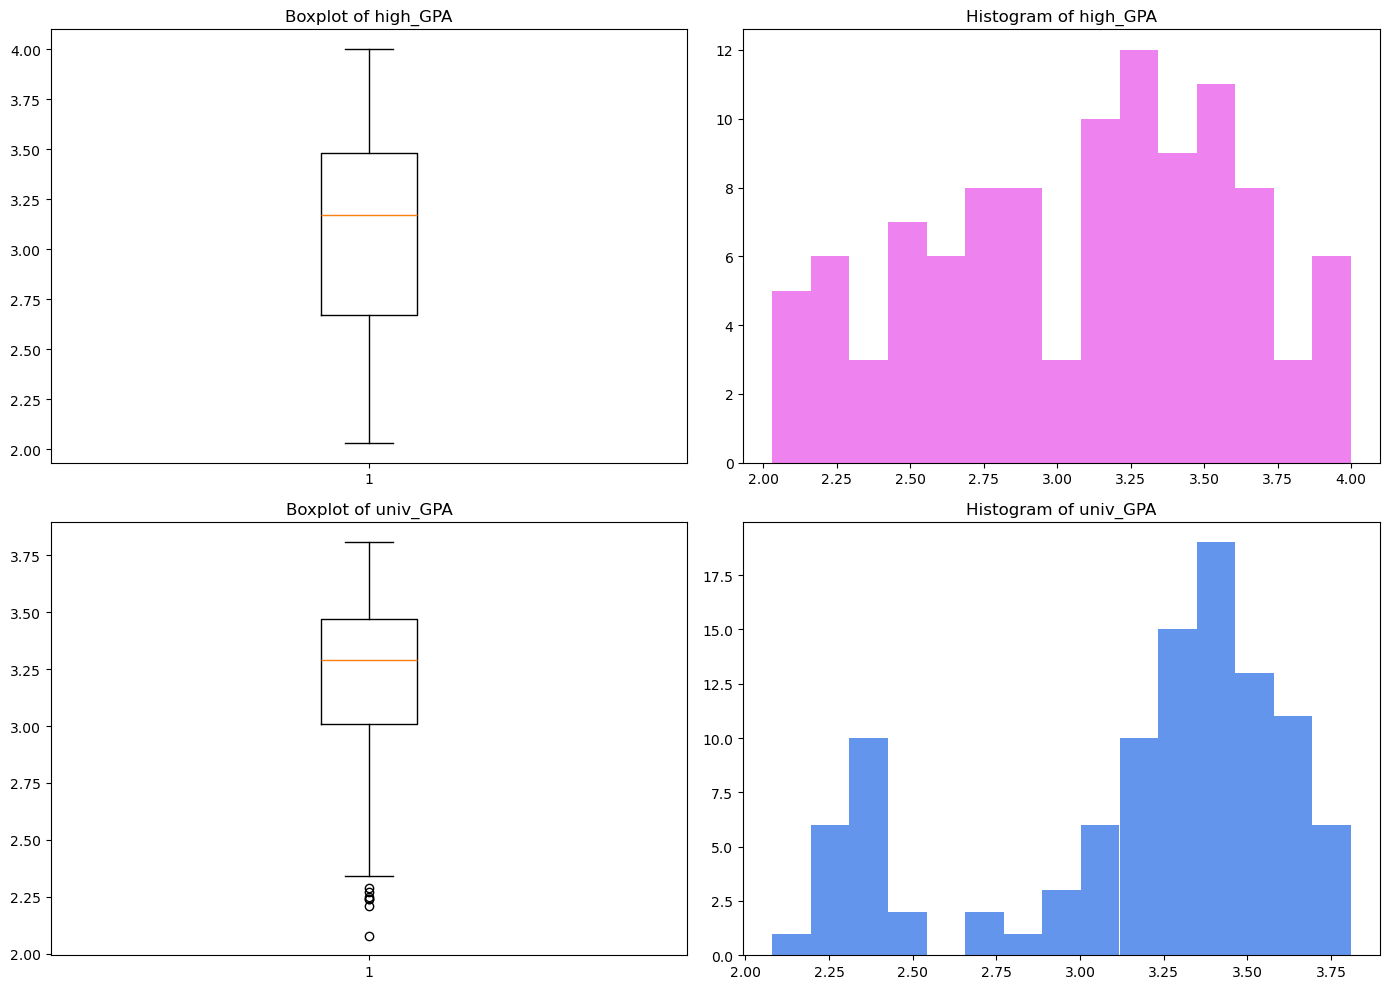

In [223]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0,0].boxplot(high_GPA)
axs[0,0].set_title('Boxplot of high_GPA')

axs[0,1].hist(high_GPA, bins=15, color='violet')
axs[0,1].set_title('Histogram of high_GPA')

axs[1,0].boxplot(univ_GPA)
axs[1,0].set_title('Boxplot of univ_GPA')

axs[1,1].hist(univ_GPA, bins=15, color='cornflowerblue')
axs[1,1].set_title('Histogram of univ_GPA')

plt.tight_layout()

**What is the correlation coefficient for all column combinations in the data file?**
(present a Table with coefficient values)

Here, I will use df.corr() which calculates the correlation coefficients for all numeric columns in my dataframe

In [149]:
df.corr(numeric_only=True)

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
high_GPA,1.000000,0.768142,0.726148,0.791472,0.779563
math_SAT,0.768142,1.000000,0.835227,0.687721,0.662784
verb_SAT,0.726148,0.835227,1.000000,0.638751,0.650301
comp_GPA,0.791472,0.687721,0.638751,1.000000,0.939046
univ_GPA,0.779563,0.662784,0.650301,0.939046,1.000000


**What is the correlation plots (scatter plots) for all column combinations in the data file?**
(present a Table with scatter plots)

For this part, I will utilize the seaborn library and print a pairplot for the dataframe. This will create a grid of scatterplots for all numerical columns in my dataframe. 

The pairplot plots each pair of variables against each other, helping to identify correlations and patterns between columns. To add more context in the visualization I created a new categorical column named GPA_Category which classifies the GPA score as low if it's value is below 3 and high otherwise. This addition will display how student's scores relate with eachother. 

#### Student Performance in University compared to Highschool
It is noticeable that students with a high GPA in highschool also tend to have good grades in university. To further explain, there’s visibly a strong linear relationship between high school GPA, university GPA and computer science GPA suggesting that students who performed good in high school tend to continue performing good in university.

#### Student SAT performance
We can also identify that students with low GPAs have more scattered SAT scores compared to high GPA students. However, Math_SAT and verb_SAT scores are positively correlated, meaning students who score well in one section of the SAT tend to score well in the other.

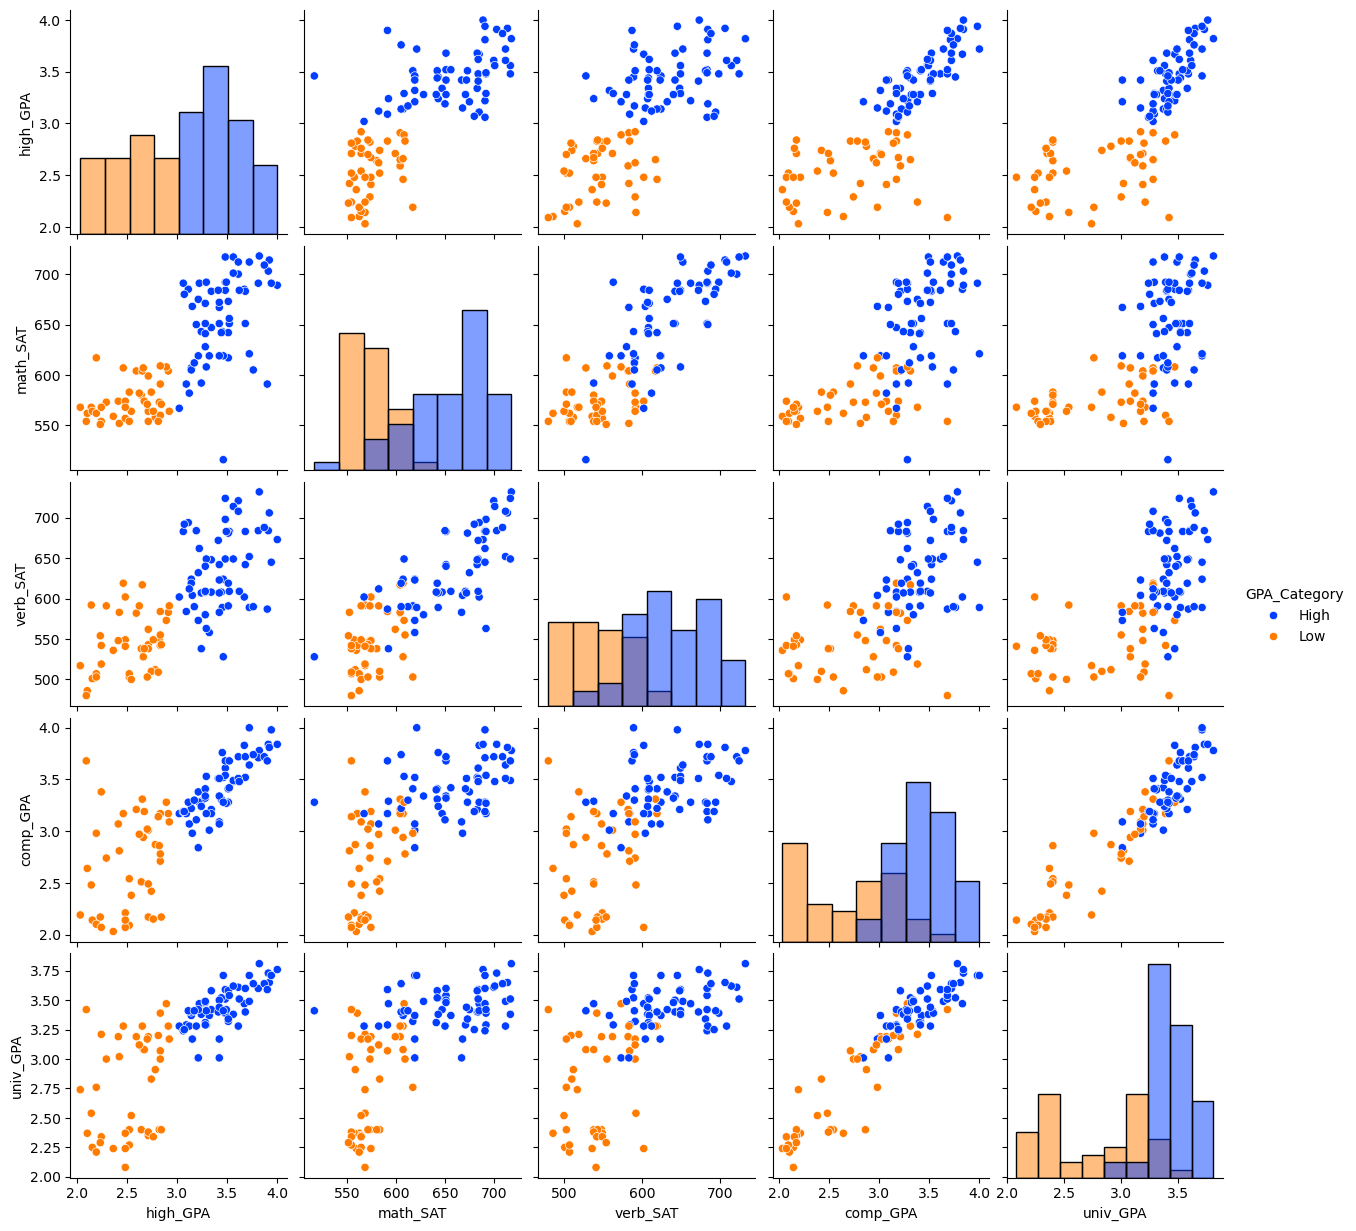

In [234]:
df['GPA_Category'] = df['high_GPA'].apply(lambda x: 'High' if x > 3 else 'Low')
sns.pairplot(df, diag_kind='hist', hue='GPA_Category', palette='bright')

**Draw a scatterplot comparing the students' high school GPAs to their overall university GPAs. What does the relationship appear to be?** 

In this scatterplot we are comparing the students highschool GPAs compared to their overall university GPAs. From the result we can identify a positive correlation between the two variables, because as high school GPAs increase, university GPAs also tend to increase. The markers form a tight cluster towards the highest scores, which suggests that the correlation is strong. Overall, it appears that students with higher high school GPAs are likely to perform better in university, as proven by their university GPAs.

Text(0.5, 0, 'Overall Univeristy GPAs')

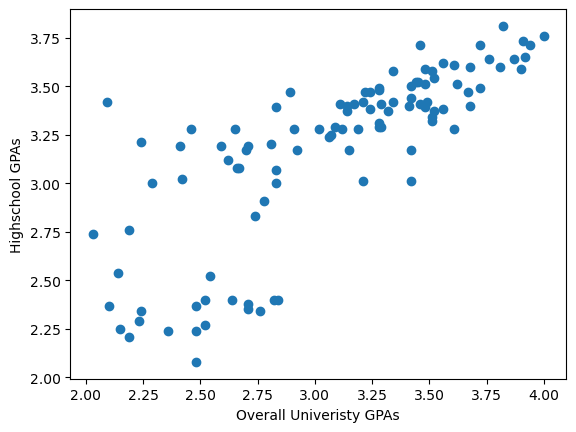

In [244]:
plt.scatter(high_GPA, univ_GPA)
plt.ylabel("Highschool GPAs")
plt.xlabel("Overall Univeristy GPAs")

**What is the correlation between high school GPA and overall university GPA?**

The correlation coefficient ranges from values -1 to 1. In this case, the result indicates that the correlation between high school GPA and overall university GPA is closer to 1, which suggests a strong positive relationship between the variables. Essentially as one score increases, the other also tends to increase. The relationship is strong, but not perfect (which would be a value of 1) meaning other factors also influence the scores.

In [159]:
correlation = df['high_GPA'].corr(df['univ_GPA'])
correlation

0.7795631205489154

**What is the mean math and verbal SAT score in this sample?**

In [164]:
df[['math_SAT', 'verb_SAT']].mean()

math_SAT    623.07619
verb_SAT    598.60000
dtype: float64

**What are the standard deviations of the math and verbal SAT scores?**

In [167]:
df[['math_SAT', 'verb_SAT']].std()

math_SAT    53.760454
verb_SAT    62.963604
dtype: float64

**Calculate the correlation between math and verbal SAT scores** (present the Spearman correlation coefficient value)

The Spearman correlation describes the monotonic relationship between 2 variables which can be non linear. In this case, we shouldn't expect these variables to show a linear relationship because exam results can vary significantly. However, the result shows that the scores are strongly related (0.827163). 

In [171]:
df[['math_SAT', 'verb_SAT']].corr(method='spearman')

,math_SAT,verb_SAT
math_SAT,1.000000,0.827163
verb_SAT,0.827163,1.000000


**What is the correlation between the students' overall university GPAs and their computer science GPAs?** (present the Pearson correlation coefficient value)

In this case, we use Pearson’s correlation because  we are expecting a linear relationship where higher overall GPAs are associated with higher computer science GPAs. The result proves this fact suggesting a strong positive relationship (0.939046) between the two.

In [175]:
df[['univ_GPA', 'comp_GPA']].corr(method='pearson')

,univ_GPA,comp_GPA
univ_GPA,1.000000,0.939046
comp_GPA,0.939046,1.000000


**Did the students have higher overall university GPAs or higher computer science GPAs?**

- Calculate each of these means
- Conduct a paired t test to see if this difference is statistically significant (caution: not 'independent' but 'paired' t-test)

To be able to understand whether the students have higher overall university GPAs or higher computer science GPA's we need to conduct a t-test. Theoretically, t-tests assume that the data comes from a normally distributed population. In our case here, we have already determined that the distribution of the GPA's is not normally distributed. This will not be an issue, because we have a large sample size and the Central Limit Theorem applies here. To conduct the t-test, we need to define the null hypothesis.

Null Hypothesis: There is no difference between the two GPAs.

After calculating the means for overall university GPA's and computer science GPA's, we see that the difference between the two means is 0.04. By conducting a paired t-test we are trying to understand if this difference is statistically significant. The reason behind using the paired t-test and not the individual t-test is because the samples are related, because the measurements are applied to the same students.  

From the test results we see that p<0.05, so we can conclude that the difference of the means is statistically significant and reject the null hypothesis. By looking at the individual means we see that mc > mt, and we can confirm that students had **higher overall GPAs**.

In [179]:
mc = df['univ_GPA'].mean()
mt = df['comp_GPA'].mean()

print(f"Mean Overall University GPA: {mc:.2f}")
print(f"Mean Computer Science GPA: {mt:.2f}")
print(f"Difference between Overall University GPA mean and Computer Science GPA mean: {mc-mt:.2f}")

t, p = st.ttest_rel(df['univ_GPA'], df['comp_GPA'])

t, p

if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Mean Overall University GPA: 3.17
Mean Computer Science GPA: 3.13
Difference between Overall University GPA mean and Computer Science GPA mean: 0.04
Reject the null hypothesis: There is a significant difference.


**Fit a simple linear regression model for predicting the overall university GPA (univ_GPA) from the math SAT score**

- Write out the simple regression equation to calculate GPA. Note the coefficients and the constant. 
- Draw the regression graph 
- Report the R2 (square) coeff of the model 
- What is the p value for the model? What is your conclusion? 
- Test the model prediction accuracy using 25% of data as test data. Report the evaluation metrics. 
- What would be the predicted GPA if someone's got a 600 on the math score? 


### Write out the simple regression equation to calculate GPA. Note the coefficients and the constant. 


Using the LinearRegression class from the sklearn module, I'm going to perform the following actions: Import - Instantiate - Fit

The predictor in this case is the math_SAT and the target the univ_GPA, as I'm trying to predict the overall university GPA from the math SAT score. Finally, I'm going to display the intercept and coefficient that the model has already calculated.

The intercept shows the predicted value of univ_GPA when math_SAT is 0. So, if someone scored 0 on the math SAT, their predicted university GPA would be: -0.2623. In this case here, this result isn't meaningful to us, because the math SAT has a minimum score of 200 and the GPA values are always above 0.

The coefficient shows us how much the GPA increases for each additional score in math_SAT. This means that for every additional (1) point the overall university GPA is increased by 0.0055. From this result we can derive a meaningful outcome, knowing that with the positive coefficient, higher math_SAT scores lead to higher university GPAs. 

In [256]:
from sklearn.linear_model import LinearRegression #IMPORT 
model = LinearRegression() #INSTANTIATE
X = df[['math_SAT']]  # Predictor
y = df['univ_GPA']    # Target 

res = model.fit(X, y) #FIT

intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Intercept: {intercept: .4f}")
print(f"Coefficient: {coefficient: .4f}")

Intercept: -0.2623
Coefficient:  0.0055


### Draw the regression graph

For the next question, I will use regplot from the seaborn library to plot the data of the linear regression model.

This plot provides insight into how well math SAT scores can predict university GPA. The upward direction of the regression line suggests a positive correlation between math SAT scores and university GPA. While the correlation exists, the data points do not form a cluster around the line and this indicates that other factors besides math SAT scores also influence university GPA. The shaded red region around the line shows how well the data fit the regression line. In our case it is a bit wide, which means there's some uncertainty. The predictions are more reliable near the center of the data and less certain at the edges. 

[Text(0.5, 1.0, 'Linear Regression: Univ GPA vs Math SAT Score')]

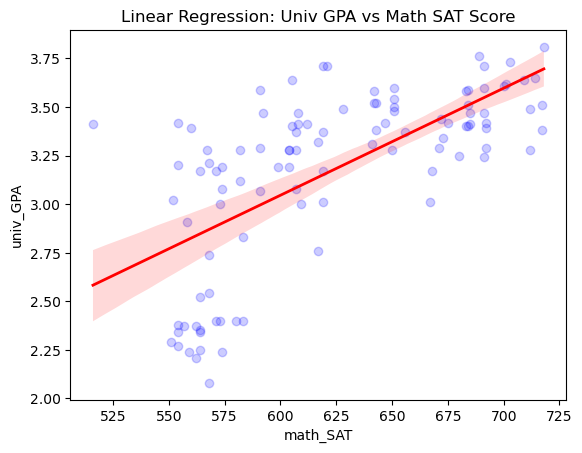

In [258]:
sns.regplot(x='math_SAT', y='univ_GPA', data=df, color='blue', marker='o',
           line_kws={'color':'red', 'linewidth':2},
           scatter_kws={'alpha':0.2}).set(title='Linear Regression: Univ GPA vs Math SAT Score')

### Report the R2 (square) coeff of the model

Here the determination coefficient is being calculated using model.score(X,y). The determination coefficient is a statistical measurement of how well the regression model fits the data. In general, we want a high r^2 value in a regression model. A value close to 1 suggests that the model fits the data well, meaning the predictors explain most of the variance in the result.

In [189]:
r_squared = model.score(X,y)
print(f"R^2 value: {r_squared: .4f}")

R^2 value:  0.4393


### What is the p value for the model? What is your conclusion? 

To be able to determine the p-value of the model I'm using the statsmodels library. This library provides detailed statistical outputs for the regression, inluding the p-value. 

Using the p-value we can test the null hypothesis. The null hypothesis says that the predictor has no effect on the dependent variable. In our example, the null hypothesis is that the math SAT score has no effect on the overall university GPA.

Starting with the dependent variable (math_SAT) we can check the probability in order to make some assumptions. Firstly, we see that the Prob (F-statistic): 1.34e-14. This value is <0.05 which means the predictor is statistically significant and there is a meaningful relationship between univ_GPA and math_SAT.

In [192]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'math_SAT ~ univ_GPA', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               math_SAT   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     80.69
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.34e-14
Time:                        23:40:06   Log-Likelihood:                -536.49
No. Observations:                 105   AIC:                             1077.
Df Residuals:                     103   BIC:                             1082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    370.2689     28.419     13.029      0.0

### Test the model prediction accuracy using 25% of data as test data. Report the evaluation metrics. 

Using the train_test_split class from sklearn we annotate 25% of the data as test data and 75% of the data as train data. In this instance we use the X_train, y_train variables to fit the model. The reasoning behind this is that if we fit the model using the entire dataset, it might perform well on the data it has already seen but it may not fit well to new data. 

In [195]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('Model Prediction Accuracy - Metrics')
print (f'MAE = {mae: .4f}')
print (f'MSE = {mse: .4f}')
print (f'RMSE = {np.sqrt(mse): .4f}')
print(f'r2 = {r2: .4f}')

Model Prediction Accuracy - Metrics
MAE =  0.2992
MSE =  0.1446
RMSE =  0.3802
r2 =  0.3828


### What would be the predicted GPA if someone's got a 600 on the math score? 

X_test needs to be passed as a DataFrame. This is why we create a DataFrame with the same column name as the original training data, and giving it the value 600. Afterwards, we're passing this argument to the model.predict()

In [198]:
test_value = pd.DataFrame({'math_SAT': [600]})
predicted_gpa_600 = model.predict(test_value)
print(f"Predicted GPA for math SAT score of 600: {predicted_gpa_600[0]:.2f}")

Predicted GPA for math SAT score of 600: 3.05


**Fit a multiple linear regression model for predicting the overall university GPA (univ_GPA) from both the math SAT score and the verbal SAT score**

- Do the same actions as in the simple model (as described above) 
- Then compare the two models based on their metrics
- What would be the predicted GPA now if someone's got a 600 on the math and a 540 on the verbal portion of the SAT? Is the prediction improved in comparison to the simple regression model?

### Write out the multiple regression equation to calculate GPA. Note the coefficients and the constant.

In this case here we're using OLS again to calculate the GPA using the multiple regression equation. The math_SAT and verb_SAT are the independent variables (also called predictors) and the univ_GPA the dependent variable (target). 

The results show that for the math_SAT coefficient for every 1-point increase in the math_SAT score, the univ_GPA is predicted to increase by 0.003291 points, assuming verb_SAT is constant. Same goes for the verb_SAT, where with every 1-point increase in this score, the univ_GPA is predicted to increase by 0.002272 points, if math_SAT is constant. As explained before, the intercept doesn't bring any meaninful value since the SAT score is always >0, however it is mathematically necessary for the regression equation.

In [202]:
model = smf.ols(formula = 'univ_GPA ~ math_SAT + verb_SAT', data = df).fit()

print(model.params,'\n')

Intercept   -0.237534
math_SAT     0.003291
verb_SAT     0.002272
dtype: float64 



### Report the R2 (square) coeff of the model 
### What is the p value for the model? What is your conclusion?

To answer both of these questions I'm going to review the OLS Regression Results, where the R^2 and p-value of the model are displayed.

- R-squared: 0.470 which means that out of all the factors affecting univ_GPA, the model with math_SAT and verb_SAT as predictors explain 47% of those. As we explained before a value closer to 1 means the model fits our data well.  Here the value of 0.470 suggests a moderate fit. The independent variables are helpful in predicting univ_GPA, but they are not the only factors affecting it.

- Prob (F-statistic): 8.49e-15. This value is extremely close to zero. This rejects the null hypothesis, meaning that at least one of the predictors (math_SAT or verb_SAT) is statistically significant in explaining univ_GPA.

Even though SAT scores don’t explain 100% of GPA (because R-sqaured is 0.47), the p-value shows that the relationship is real and not due to random chance.

In [206]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               univ_GPA   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     45.27
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           8.49e-15
Time:                        23:40:20   Log-Likelihood:                -30.633
No. Observations:                 105   AIC:                             67.27
Df Residuals:                     102   BIC:                             75.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2375      0.375     -0.633      0.5

### Test the model prediction accuracy using 25% of data as test data. Report the evaluation metrics.

In this case I'm following the exact same method as in the linear regression problem, with the only difference being the X value that is set as math_SAT and verb_SAT.

In [209]:
X = df[['math_SAT', 'verb_SAT']]
y = df['univ_GPA']

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('Model Prediction Accuracy - Metrics')
print (f'MAE = {mae: .4f}')
print (f'MSE = {mse: .4f}')
print (f'RMSE = {np.sqrt(mse): .4f}')
print(f'r2 = {r2: .4f}')

Model Prediction Accuracy - Metrics
MAE =  0.2961
MSE =  0.1432
RMSE =  0.3785
r2 =  0.3884


### Compare the two models based on their metrics

#### Linear Regression Results (Model 1)
- MAE =  0.2992
- MSE =  0.1446
- RMSE =  0.3802
- r2 =  0.3828

#### Multiple Linear Regression Results (Model 2)
- MAE =  0.2961
- MSE =  0.1432
- RMSE =  0.3785
- r2 =  0.3884

Mean Squared Error (MSE): Measures the average of the **squared** differences between the actual and predicted values. Lower values indicate better model performance.

Mean Absolute Error (MAE): Measures the average of the **absolute** differences between the actual and predicted values. Like MSE, lower values are better.

Root Mean Squared Error (RMSE): It shows how well the regression model fits the data showing how far predictions are from actual values. A lower RMSE indicates more accurate predictions.

R-squared (R²): Represents how well the model explains the variance in the target variable. 

In the Model 2 metrics we can see that there is a small decline in the MAE, MSE and RMSE values, and as explained above, all of these terms indicate a better model performance than before. For example, for RMSE we see that before it was 0.3802 and now is 0.3785, meaning that at the end the predictions the model makes are off by about 0.3785 GPA points. However, when it comes to the values of R-squared, there is a slight increase from Model 1 to Model 2, which also is a good observation because a higher R-squared value indicates that the model is now able to explain a larger percentage of the variability in the university GPA, because it includes both math_SAT and verb_SAT as predictors. 

This improvement in both error metrics (MAE, MSE, RMSE) and R-squared suggests that adding the verbal SAT score as a second predictor has  enhanced the model’s ability to predict univ_GPA. 

### What would be the predicted GPA now if someone's got a 600 on the math and a 540 on the verbal portion of the SAT? Is the prediction improved in comparison to the simple regression model?

In the previous model we used only the math_SAT as a predictor and the result (having a 600 score on math) was 3.05 GPA. Now using the verbal SAT score the GPA has decreased to 2.96. This happens because the verb_SAT score is also used to explain the variation in the GPA result. In this model, the math SAT coefficient decreases from 0.0055 to 0.003291 because part of the GPA variation is now explained by the verbal SAT. 

The result can be more realistic because it uses both predictors, providing us with giving a better prediction of GPA.

In [214]:
test_values = pd.DataFrame({'math_SAT': [600], 'verb_SAT': [540]})
predicted_gpa = model.predict(test_values)
print(f'Predicted GPA: {predicted_gpa[0]:.2f}')

Predicted GPA: 2.96
